# Study on The Insights Data Set


`Imports`


In [149]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [150]:
df = pd.read_csv("Insights.csv")
df=df.replace(np.NaN,-1)


['Date', 'HS Code', 'Product', 'Specific Product', 'Port of Origin', 'Country of Destination', 'Port of Destination', 'Value(USD)', 'Std Qty', 'Std Unit', 'Std Unit Price(USD)', 'Qty', 'Unit', 'Value In FC', 'Unit Rate In FC', 'Unit Rate Currency', 'Value(INR)', 'Shipment Mode', 'Invoice Value INR']


In [151]:
X = np.array(df['Qty']).reshape((-1, 1))
y = np.array(df['Unit Rate In FC']).reshape((-1, 1))

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [153]:
model = LinearRegression()

In [154]:
model.fit(X,y)

LinearRegression()

In [155]:
 r_sq = model.score(X_train,y_train)

In [156]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0015909969779165367


In [157]:
print('intercept:', model.intercept_)

intercept: [21.73253842]


In [158]:
 print('slope:', model.coef_)

slope: [[-0.00031225]]


In [159]:
y_predict=model.predict([[100]])
print(y_predict)

[[21.7013136]]


## The Neg Mean Square value is Important which is the below cell



In [160]:
np.sqrt(mean_squared_error(X_train,y_train))
print(metrics.r2_score(y_true=y_train, y_pred=model.predict(X_train)))

0.0015909969779165367


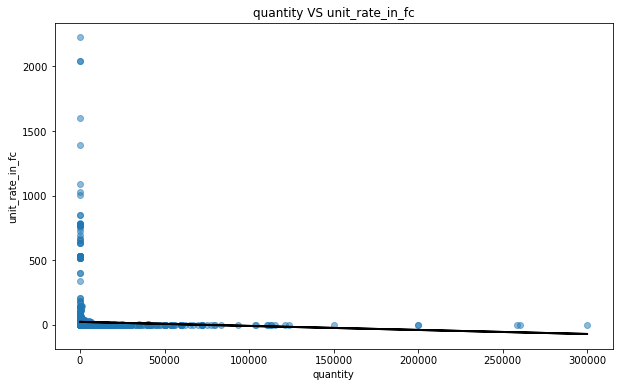

In [161]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,alpha=0.5)
plt.plot(X,model.predict(X), color='black',linewidth=2)
plt.title("quantity VS unit_rate_in_fc")
plt.xlabel("quantity")
plt.ylabel("unit_rate_in_fc")
plt.show()

### as we can see from the above linear regression model the points are away from the diagonal and the diagonal is moving downwards hence we need to use 

# Using Ridge Regression

In [162]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [163]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [164]:
y_predt1 = R.predict(X_test)

In [165]:
print("R2 score",r2_score(y_test,y_predt1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predt1)))

R2 score -0.016796504322307282
RMSE 53.18230266686484


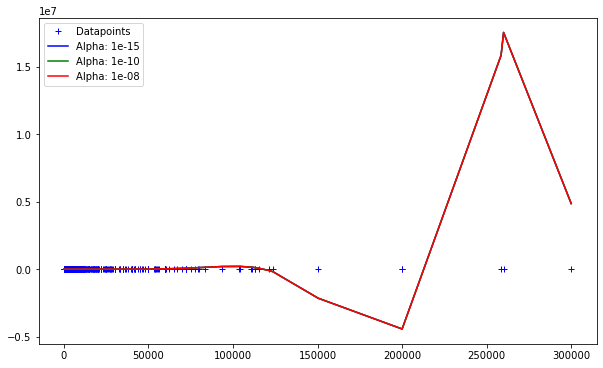

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(X, Y, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(X, y)
    return model.predict(X)

alphas = [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
cs = [ 'b','g','r']

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(X, y, alpha)
    # Plot
    plt.plot(sorted(X[:, 0]), preds[np.argsort(X[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()